In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn
import graphviz 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier, export_graphviz 

In [44]:
dt_clf = DecisionTreeClassifier(random_state=121)

##### Decision Tree Visualization 

In [45]:
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
 

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [47]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

In [48]:
export_graphviz(dt_clf, out_file="E:\\workSpace_Etc\\tree2.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

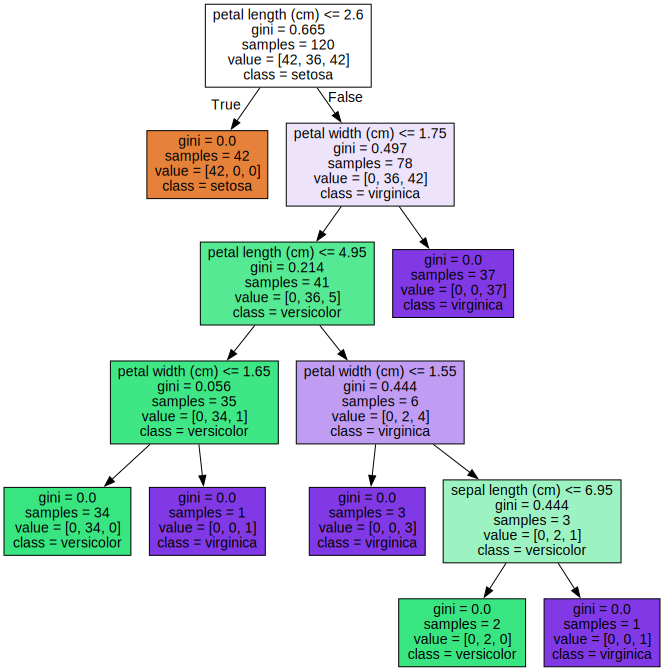

In [49]:
with open("E:\\workSpace_Etc\\tree2.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [50]:

iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Decision Tree Feature Importance 

In [51]:
print("Feature Importances :\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature Importances :
[0.017 0.    0.566 0.417]


In [52]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

sepal length (cm) : 0.017
sepal width (cm) : 0.000
petal length (cm) : 0.566
petal width (cm) : 0.417


<AxesSubplot:>

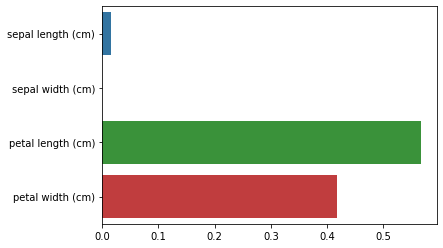

In [54]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)